### Pre-processing
#### Company: Bharat Petroleum Corporation Ltd.,ENERGY,BPCL,EQ,INE029A01011
The VWAP (Volume Weighted Average Price) is the target variable to predict. VWAP is a trading benchmark used by traders that gives the average price the stock has traded at throughout the day, based on both volume and price.
Reference: https://www.kaggle.com/yashvi/time-series-analysis-and-forecasting-reliance

In [2]:
import pandas as pd
stock_market_data = pd.read_csv('stock_market.csv')
stock_market_data.columns

Index(['Time', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble', 'Time.1'],
      dtype='object')

In [3]:
df = stock_market_data.drop(['Time.1'], axis = 1)
df_vwap = df[['Time','VWAP']]

# Looking for missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()],axis = 1)
missing.columns=['count', '%']
missing = missing.sort_values(by='count')
missing

,count,%
Time,0,0.0
Prev Close,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Last,0,0.0
Close,0,0.0
VWAP,0,0.0
Volume,0,0.0
Turnover,0,0.0


### Move Time to become the index of df

In [4]:
df = df.set_index('Time')
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Time,,,,,,,,,,,
2000-01-03,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,443175.0,0.44345
2000-01-04,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,443175.0,0.44345
2000-01-05,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,443175.0,0.44345
2000-01-06,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,443175.0,0.44345
2000-01-07,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,443175.0,0.44345
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,423.05,426.00,428.35,417.55,417.60,418.90,421.33,6444098,2.715060e+14,2408600.0,0.37380
2021-04-27,418.90,417.50,423.10,416.55,420.00,420.35,420.45,5408165,2.273853e+14,2300523.0,0.42540
2021-04-28,420.35,422.00,424.35,414.90,417.15,417.50,419.33,9902533,4.152459e+14,5176820.0,0.52280


In [5]:
df.dtypes # 1. No categorical features

Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

#### 2. Need to standardize data3; Need to train_test_split the data

In [6]:
# Train-test-split
# Split the data into train_data and test_data
from sklearn.model_selection import train_test_split
y = df[['VWAP']]
X = df.drop(['VWAP'], axis=1)

features = ['Prev Close','Open', 'High', 'Low',
       'Last', 'Close',
       'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble']
rows = X.index

y1 = pd.DataFrame(y, columns=['VWAP'], index=X.index)
X1 = pd.DataFrame(X, columns=features, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.20, random_state=42)

In [7]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
X_train = scaler.fit_transform(X_train)
# Now apply the transformations to the test data
X_test = scaler.transform(X_test)

In [73]:
# Write to a file
X1.to_csv('X1_stock_market.csv')
y1.to_csv('y1_stock_market.csv')

#### Visualize the raw data (Reference: https://www.kaggle.com/parulpandey/getting-started-with-time-series-using-pandas)

Text(0, 0.5, 'VWAP')

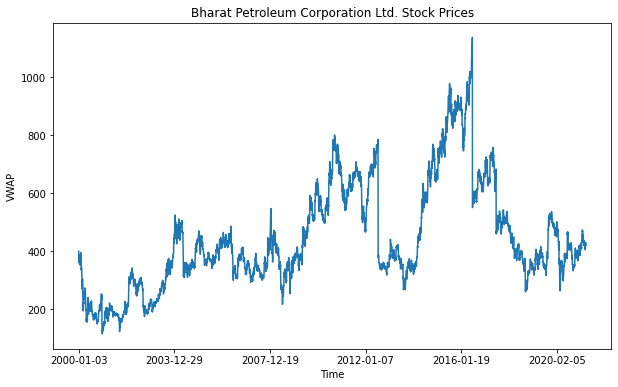

In [8]:
import matplotlib.pyplot as plt
df['VWAP'].plot(figsize=(10,6),title='Bharat Petroleum Corporation Ltd. Stock Prices')
plt.ylabel('VWAP') # volume weighted average price'

<AxesSubplot:xlabel='VWAP', ylabel='Density'>

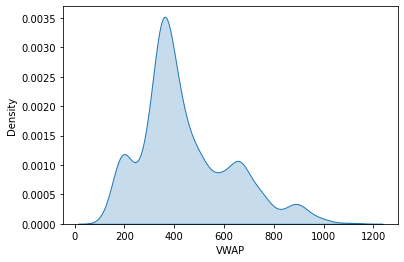

In [9]:
import seaborn as sns
sns.kdeplot(df_vwap['VWAP'],shade=True)

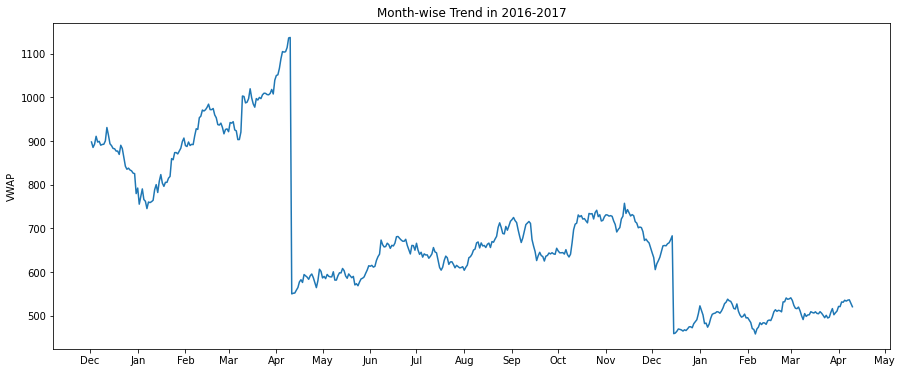

In [10]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df_vwap['Time'] = df_vwap['Time'].apply(pd.to_datetime)
df_vwap.dtypes

vwap_subset = df_vwap['Time']
vwap_subset.tail(3)

ax = df_vwap.loc[(df_vwap['Time'].dt.year >= 2016) & (df_vwap['Time'].dt.year <= 2017), 'VWAP'].plot(figsize=(15,6))

ax.set_title('Month-wise Trend in 2016-2017'); 
ax.set_ylabel('VWAP');

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'));

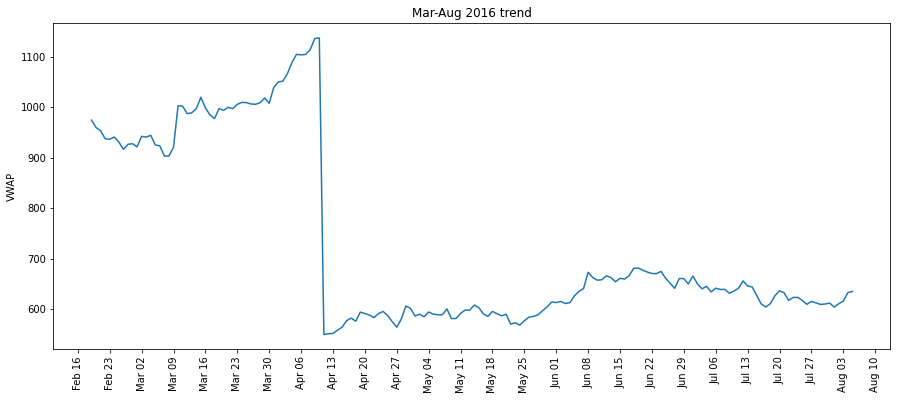

In [11]:
ax = df_vwap.loc[((df_vwap['Time'].dt.year >= 2016) & (df_vwap['Time'].dt.month >= 4)) & ((df_vwap['Time'].dt.year <= 2016)&(df_vwap['Time'].dt.month >= 5)), 'VWAP'].plot(figsize=(15,6))
#ax = df_vwap.loc['2016-05':'2016-06','VWAP'].plot(marker='o', linestyle='-',figsize=(15,6))
ax.set_title('Mar-Aug 2016 trend'); 
ax.set_ylabel('VWAP');
plt.xticks(rotation = 90)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

### Time-series seasonal decomposition
#### We can decompose a time series into trend, seasonal and remainder(residual) components, as mentioned in the earlier section. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual. 
#### The seasonal_decompose in statsmodels is used to implement the decomposition.

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [13]:
plt.rcParams.update({'figure.figsize': (10,10)}) #rcParams is matplotlib default settings
y = df_vwap['VWAP'].to_frame()

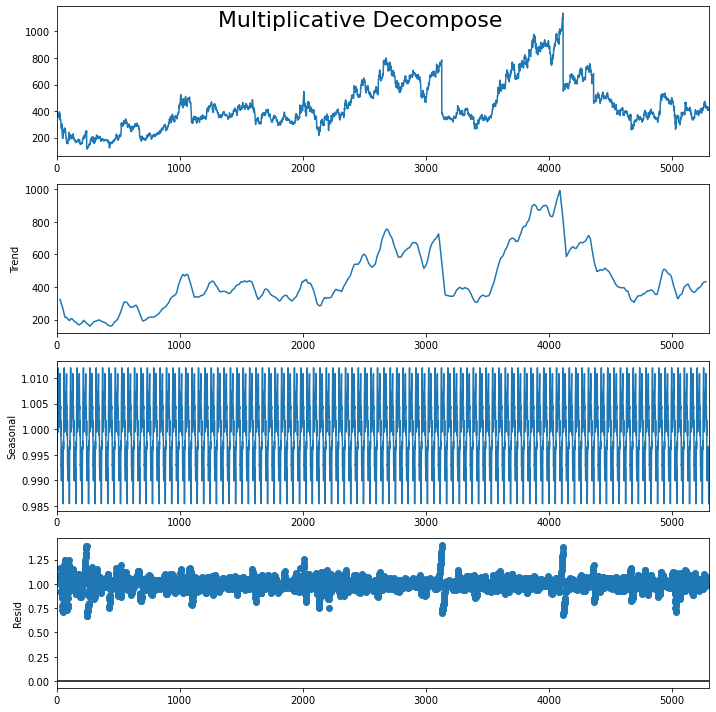

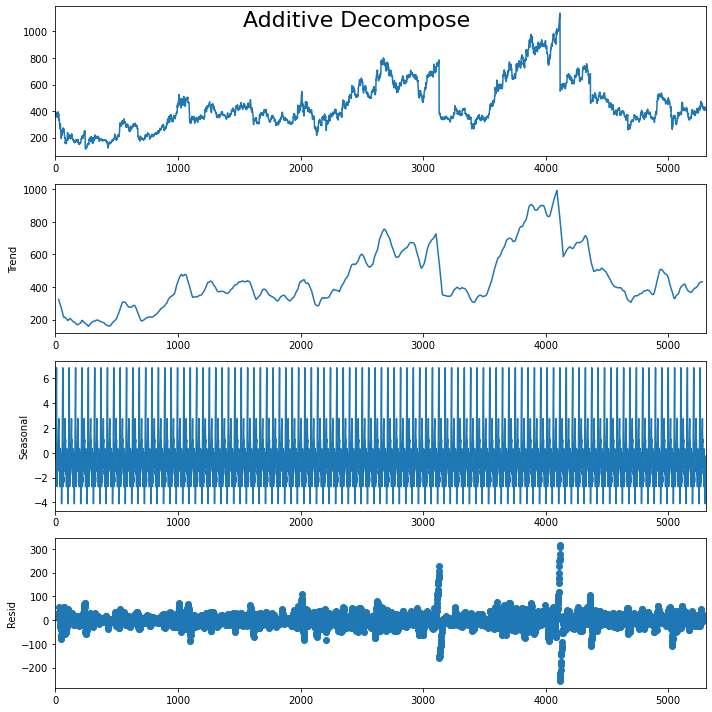

In [14]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(y, model='multiplicative', period = 52)

# Additive Decomposition
result_add = seasonal_decompose(y, model='additive', period = 52)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

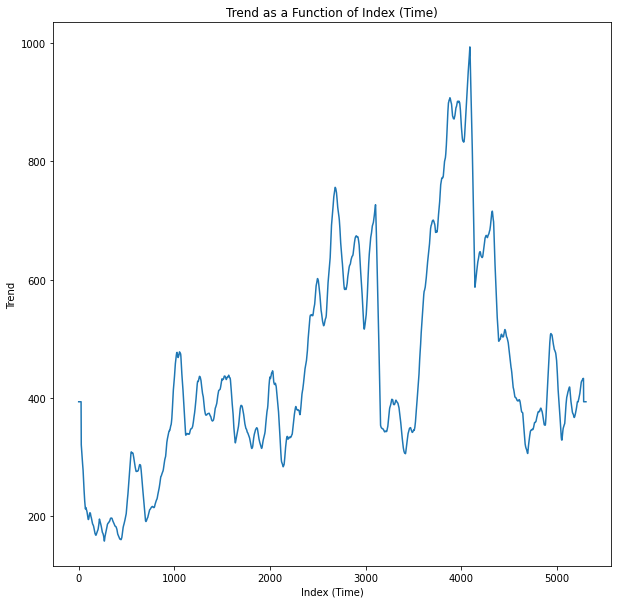

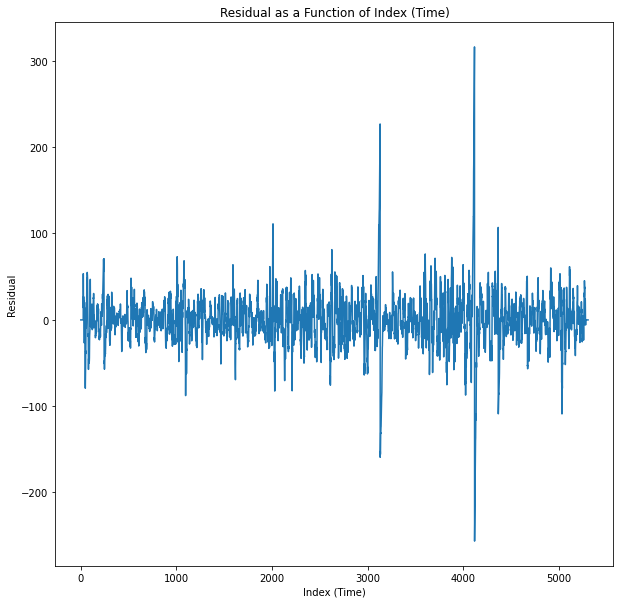

      seasonal       trend  residual  actual_values
0    -0.435591  393.468606 -0.331452         399.32
1    -0.278607  393.468606 -0.331452         375.71
2    -0.013927  393.468606 -0.331452         359.96
3    -0.109727  393.468606 -0.331452         380.10
4     1.922559  393.468606 -0.331452         378.33
...        ...         ...       ...            ...
5301 -0.545356  393.468606 -0.331452         421.33
5302 -4.100929  393.468606 -0.331452         420.45
5303 -2.502853  393.468606 -0.331452         419.33
5304 -0.435591  393.468606 -0.331452         420.00
5305 -0.278607  393.468606 -0.331452         428.14

[5306 rows x 4 columns]


In [42]:
## Extract the Components
plt.plot(df_reconstructed.trend)
plt.title('Trend as a Function of Index (Time)')
plt.xlabel('Index (Time)')
plt.ylabel('Trend')
plt.show()

plt.plot(df_reconstructed.residual)
plt.title('Residual as a Function of Index (Time)')
plt.xlabel('Index (Time)')
plt.ylabel('Residual')
plt.show()

# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seasonal', 'trend', 'residual', 'actual_values']

# Impute missing values: trend looks skewed, so we'll impute missing values with median
df_reconstructed['trend'] = df_reconstructed['trend'].fillna(df_reconstructed['trend'].median())

# Impute missing values: residual looks skewed, so we'll impute missing values with median
df_reconstructed['residual'] = df_reconstructed['residual'].fillna(df_reconstructed['residual'].median())

print(df_reconstructed)

In [29]:
# Confirming any missing values
missing = pd.concat([df_reconstructed.isnull().sum(), 100 * df_reconstructed.isnull().mean()],axis = 1)
missing.columns=['count', '%']
missing = missing.sort_values(by='count')
missing

,count,%
seasonal,0,0.0
trend,0,0.0
residual,0,0.0
actual_values,0,0.0


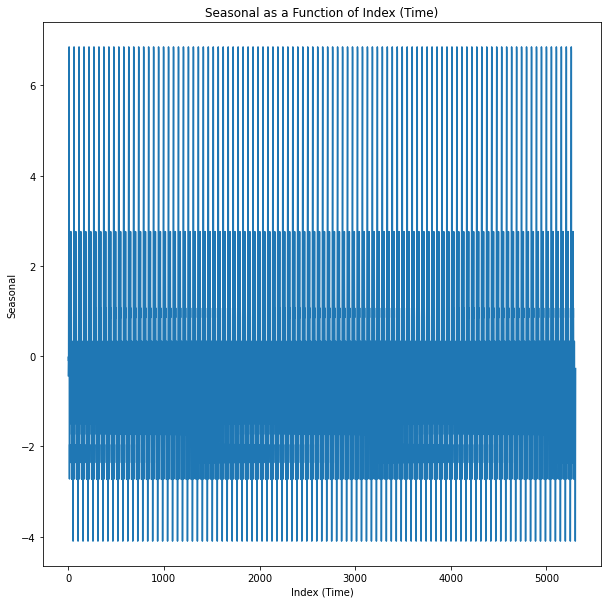

In [45]:
plt.plot(df_reconstructed.seasonal)
plt.title('Seasonal as a Function of Index (Time)')
plt.xlabel('Index (Time)')
plt.ylabel('Seasonal')
plt.show()

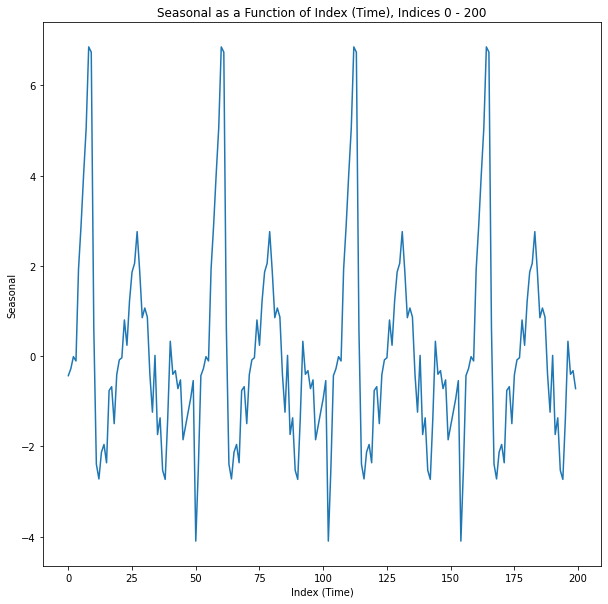

In [44]:
small = df_reconstructed['seasonal'].head(200)
plt.plot(small)
plt.title('Seasonal as a Function of Index (Time), Indices 0 - 200')
plt.xlabel('Index (Time)')
plt.ylabel('Seasonal')
plt.show()

### Feature Extraction
#### Let's extract time and date features from the 'Time' column.

In [50]:
#df_vwap['Time'] = df_vwap.index
#df_vwap = df_vwap.drop(['level_0'], axis = 1)
#df_vwap = df_vwap.drop(['index'], axis = 1)

df_vwap['year'] = df_vwap.Time.dt.year
df_vwap['month'] = df_vwap.Time.dt.month
df_vwap['day'] = df_vwap.Time.dt.day
df_vwap['day of week'] = df_vwap.Time.dt.dayofweek
#df_vwap['weekday name'] = df_vwap.Time.dt.weekday_name
df_vwap['Weekday'] = df_vwap['Time'].dt.day_name()
df_vwap.reset_index(inplace = True, drop = True)

#Set Date column as the index column.
df_vwap.set_index('Time', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week,Weekday
Time,,,,,,
2000-01-03,399.32,2000,1,3,0,Monday
2000-01-04,375.71,2000,1,4,1,Tuesday
2000-01-05,359.96,2000,1,5,2,Wednesday
2000-01-06,380.10,2000,1,6,3,Thursday
2000-01-07,378.33,2000,1,7,4,Friday


### Time resampling

Text(0.5, 1.0, 'Yearly Mean VWAP for Bharat Petroleum Corporation Ltd.')

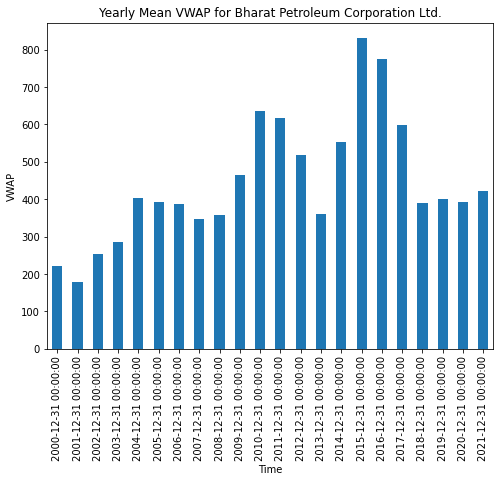

In [51]:
ax = plt.rcParams['figure.figsize'] = (8, 6)
ax = df_vwap['VWAP'].resample('A').mean().plot(kind='bar')
ax.set_ylabel('VWAP');
plt.title('Yearly Mean VWAP for Bharat Petroleum Corporation Ltd.')

Text(0.5, 1.0, 'Yearly start Mean VWAP for Bharat Petroleum Corporation Ltd.')

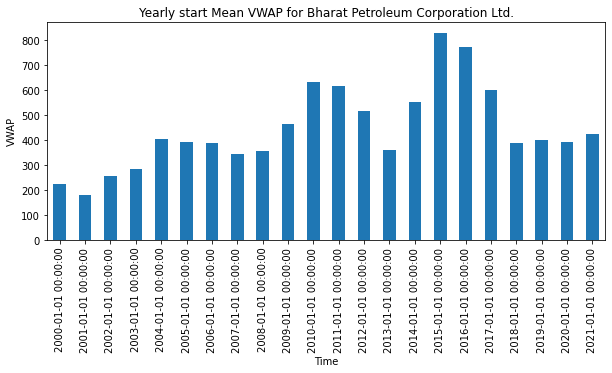

In [52]:
ax = df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
ax.set_ylabel('VWAP');
plt.title('Yearly start Mean VWAP for Bharat Petroleum Corporation Ltd.')

Text(0.5, 1.0, 'Monthly start Mean VWAP for Bharat Petroleum Corporation Ltd.')

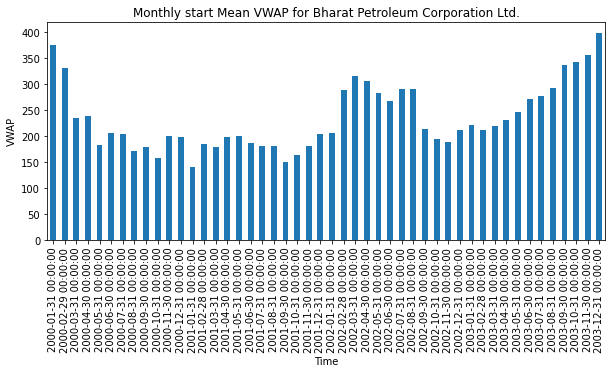

In [58]:
# Monthly resample
ax = df_vwap['VWAP'].head(1000).resample('M').mean().plot(kind='bar',figsize = (10,4))
ax.set_ylabel('VWAP');
plt.title('Monthly start Mean VWAP for Bharat Petroleum Corporation Ltd.')